## DengAI competition
The goal of this competition is to build a model that predicts the number of Dengue cases in San Juan and Iquitos

We start by exploring the data.
- [X] Load data
- [X] Basic EDA
- [X] Features correlation

### Import libraries

In [1]:
import pandas as pd
import os
import seaborn as sns
from dateutil import parser
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
tqdm.pandas()

### Load data

In [2]:
data_folder = 'data'
features_train_path = 'dengue_features_train.csv'
labels_train_path = 'dengue_labels_train.csv'
features_test_path = 'dengue_features_test.csv'

In [3]:
features_train = pd.read_csv(os.path.join(data_folder, features_train_path))
labels_train = pd.read_csv(os.path.join(data_folder, labels_train_path))
features_test = pd.read_csv(os.path.join(data_folder, features_test_path))

In [4]:
features_train[['city', 'year']].drop_duplicates()

,city,year
0,sj,1990
35,sj,1991
87,sj,1992
139,sj,1993
191,sj,1994
243,sj,1995
295,sj,1996
347,sj,1997
399,sj,1998
451,sj,1999


In [5]:
features_test[['city', 'year']].drop_duplicates()

,city,year
0,sj,2008
35,sj,2009
87,sj,2010
139,sj,2011
191,sj,2012
243,sj,2013
260,iq,2010
286,iq,2011
338,iq,2012
390,iq,2013


### Basic Pre-processing

In [6]:
# transform week_start_date into a datetime feature
features_train['week_start_date'] = features_train.progress_apply(lambda x: parser.parse(x.week_start_date), axis=1)

  0%|          | 0/1456 [00:00<?, ?it/s]

In [7]:
# Merge features and labels for easier exploration
train_df = features_train.merge(labels_train, on=['city', 'year', 'weekofyear'])

### Print dataframes

In [8]:
train_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [9]:
features_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


### Columns

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   object        
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1262 non-null   float64       
 5   ndvi_nw                                1404 non-null   float64       
 6   ndvi_se                                1434 non-null   float64       
 7   ndvi_sw                                1434 non-null   float64       
 8   precipitation_amt_mm                   1443 non-null   float64       
 9   reanalysis_air_temp_k                  1446 non-null   float64 

## Plots

<AxesSubplot:>

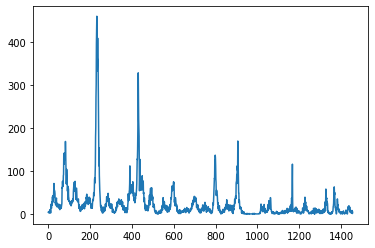

In [11]:
# Raw total_cases
train_df.total_cases.plot()

<AxesSubplot:xlabel='week_start_date', ylabel='total_cases'>

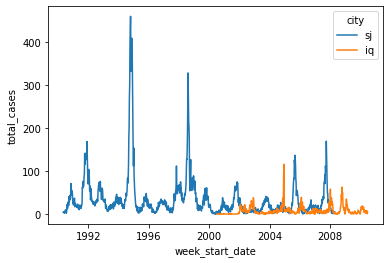

In [12]:
# Total cases per week by city
sns.lineplot(x='week_start_date', y='total_cases', hue='city', data= train_df)

<AxesSubplot:xlabel='weekofyear', ylabel='total_cases'>

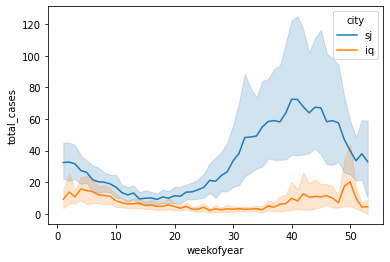

In [14]:
#Total cases per week of year by city
sns.lineplot(x='weekofyear', y='total_cases', hue='city', data= train_df)

<AxesSubplot:xlabel='weekofyear', ylabel='station_avg_temp_c'>

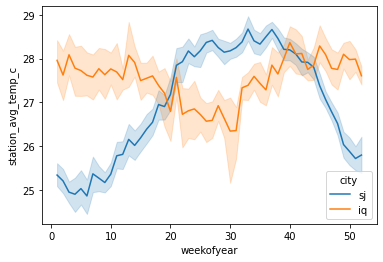

In [15]:
# Temperature per week of year by city
sns.lineplot(x='weekofyear', y='station_avg_temp_c', hue='city', data= train_df)

<AxesSubplot:xlabel='weekofyear', ylabel='reanalysis_avg_temp_k'>

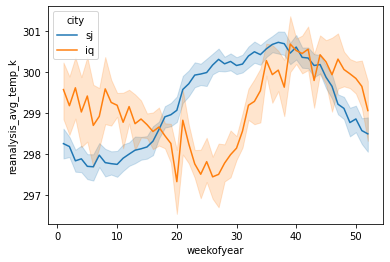

In [16]:
# Temperature per week of year by city
sns.lineplot(x='weekofyear', y='reanalysis_avg_temp_k', hue='city', data= train_df)

<AxesSubplot:xlabel='weekofyear', ylabel='reanalysis_max_air_temp_k'>

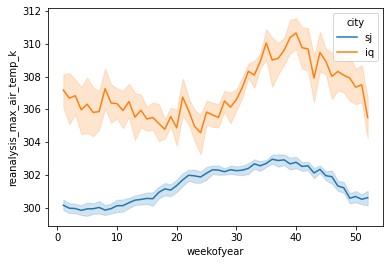

In [17]:
# Temperature per week of year by city
sns.lineplot(x='weekofyear', y='reanalysis_max_air_temp_k', hue='city', data= train_df)

<AxesSubplot:xlabel='weekofyear', ylabel='reanalysis_min_air_temp_k'>

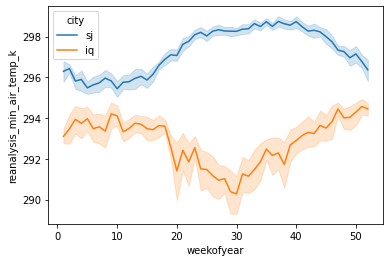

In [18]:
# Temperature per week of year by city
sns.lineplot(x='weekofyear', y='reanalysis_min_air_temp_k', hue='city', data= train_df)

From this two plots we can obtain some initial conclusions.

Theres a bit of a delay between the peak of temperature and the peak of cases.

Mosquitos prefer warmer places, which can infer that in a warmer season, mosquitos reproduce faster. After a couple of week of population increase we can start seeing an increase in the number of cases.

<AxesSubplot:xlabel='weekofyear', ylabel='station_precip_mm'>

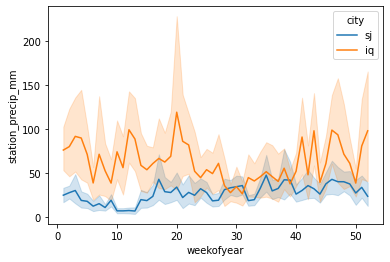

In [19]:
# Precipitation per week of year by city
sns.lineplot(x='weekofyear', y='station_precip_mm', hue='city', data= train_df)

<AxesSubplot:xlabel='weekofyear', ylabel='reanalysis_precip_amt_kg_per_m2'>

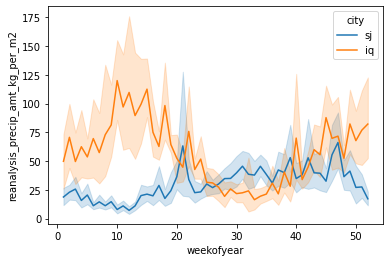

In [20]:
# Precipitation per week of year by city
sns.lineplot(x='weekofyear', y='reanalysis_precip_amt_kg_per_m2', hue='city', data= train_df)

The Dengue mosquito also grows in recipients with water, so rainiy seasons might have a relationship with the number of cases, but from this initial plot, there's no obvious conclusion

## Other plots

### Different features by week of year
In this set of plots, we can see some opposite values in some weather features, indicating some shifting on the seasons

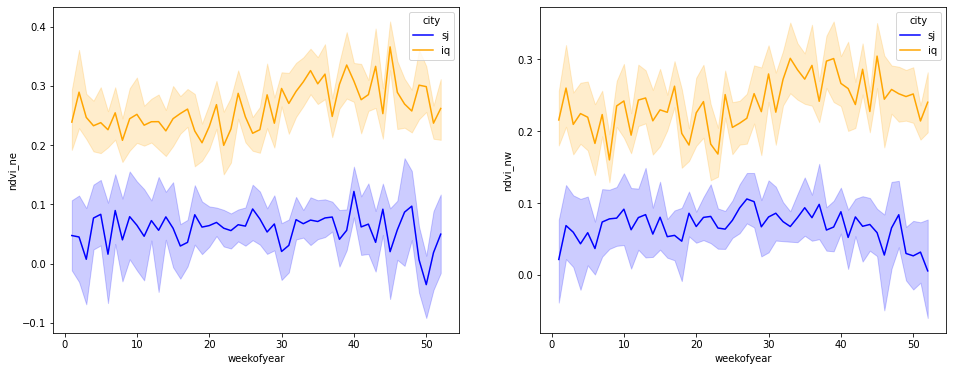

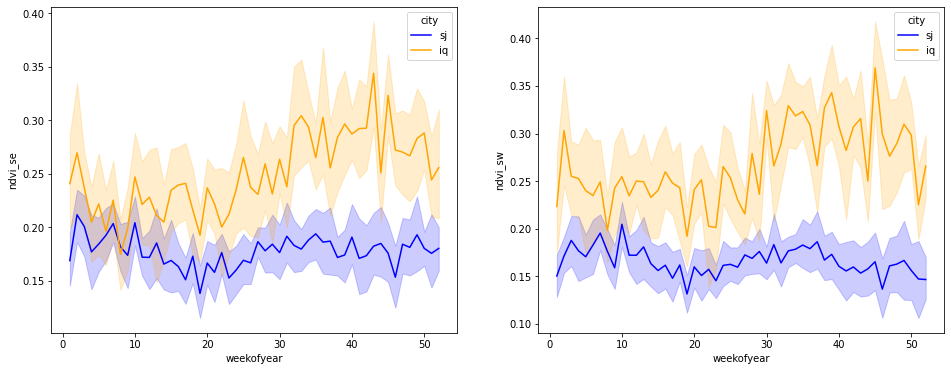

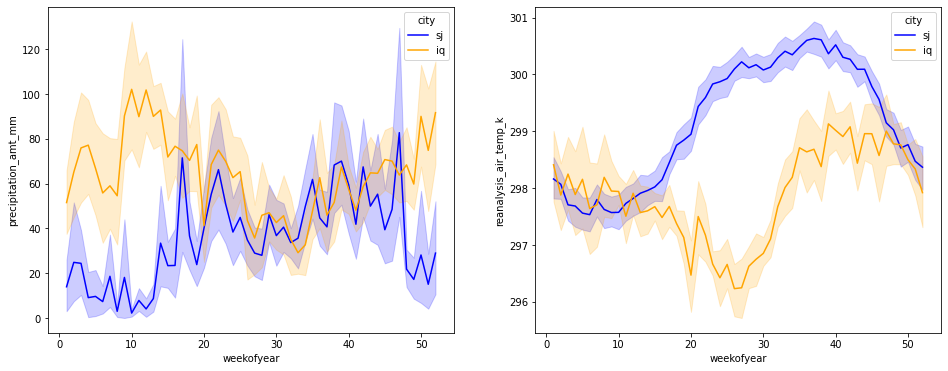

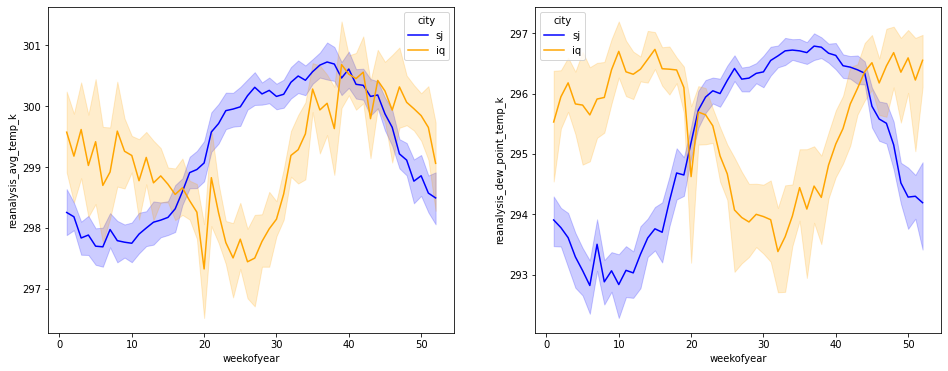

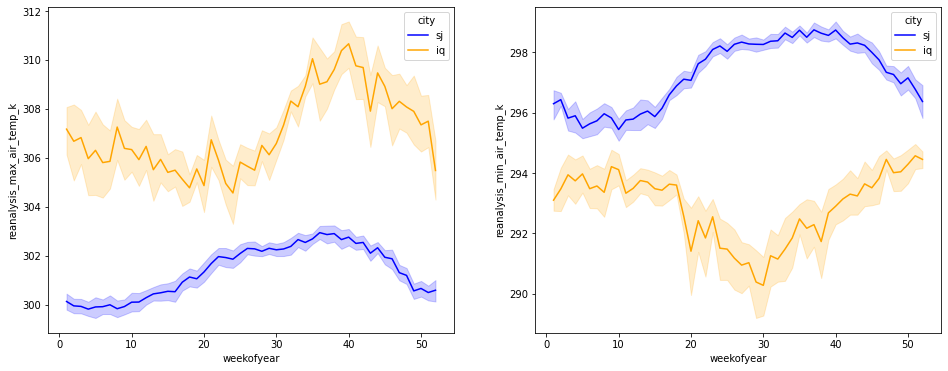

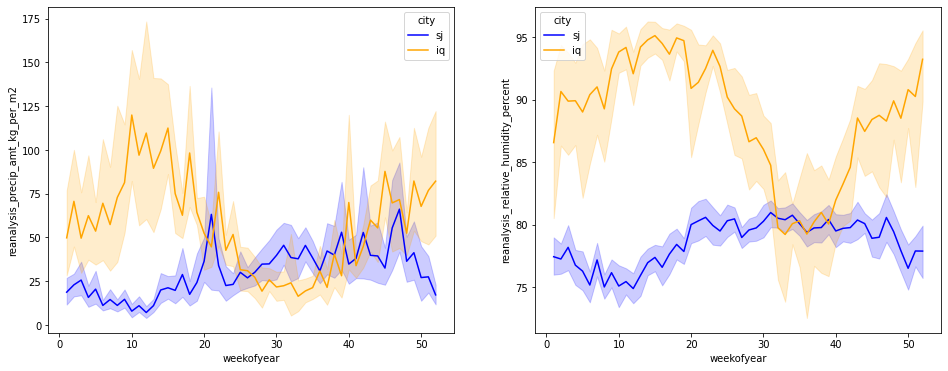

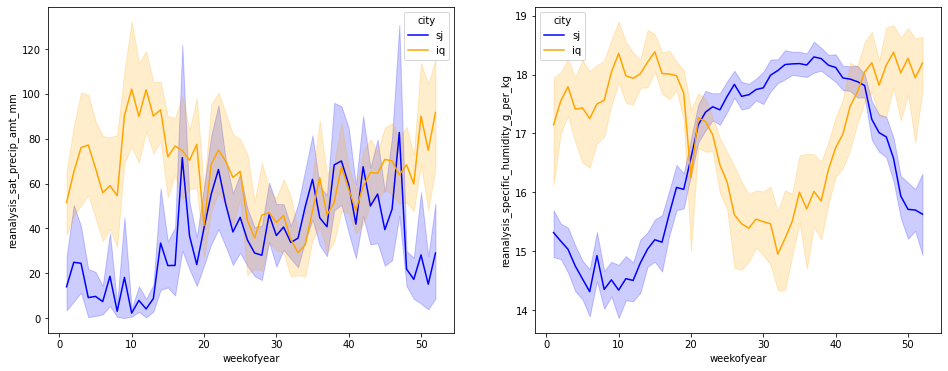

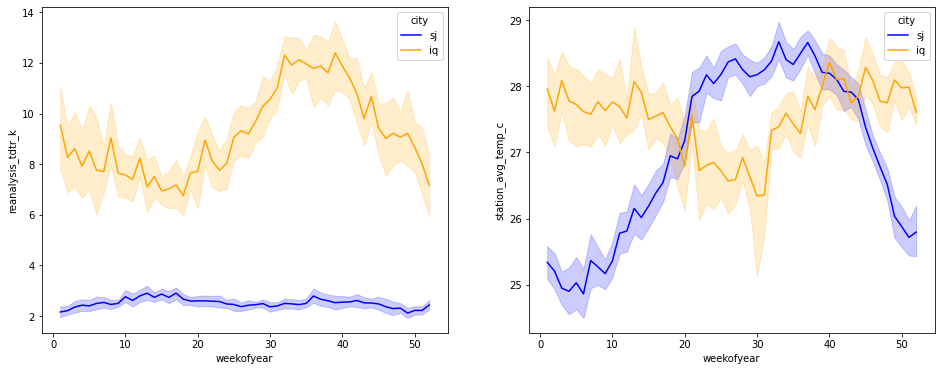

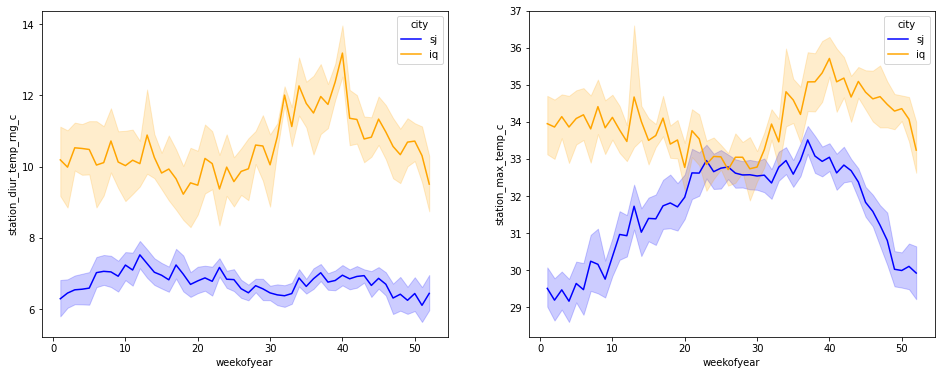

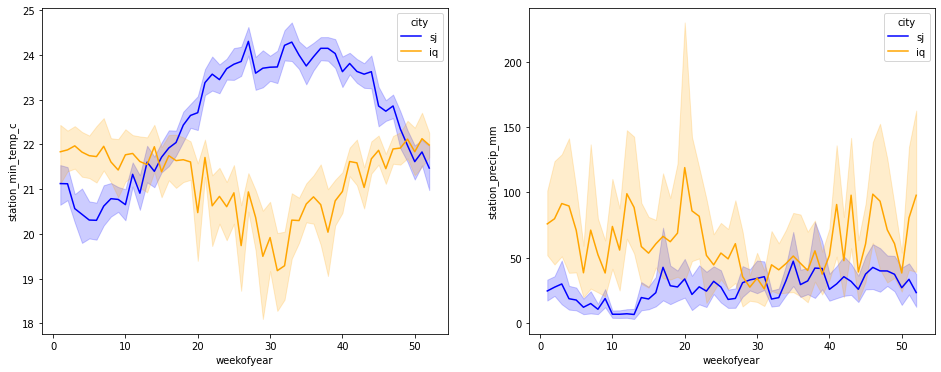

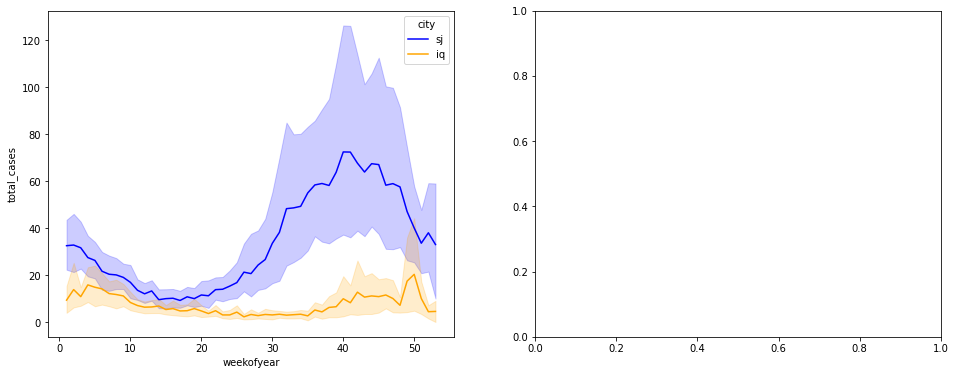

In [63]:
columns = [col for col in train_df.columns if col not in ['city', 'weekofyear', 'year', 'week_start_date']]
for i in range(0, len(columns), 2):
    fig, ax =plt.subplots(1,2, figsize=(16, 6))
    sns.lineplot(ax=ax[0], x='weekofyear', y=columns[i], hue='city', data = train_df, palette=['blue', 'orange'])
    if i+1 < len(columns):
        sns.lineplot(ax=ax[1], x='weekofyear', y=columns[i+1], hue='city', data = train_df, palette=['blue', 'orange'])
    plt.show()

### Features by week start date
Here we can see different features over time, we can observe how different each value span for each city

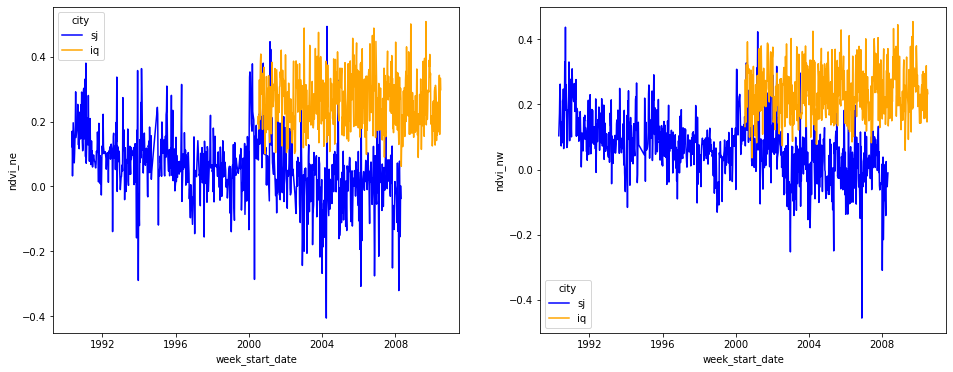

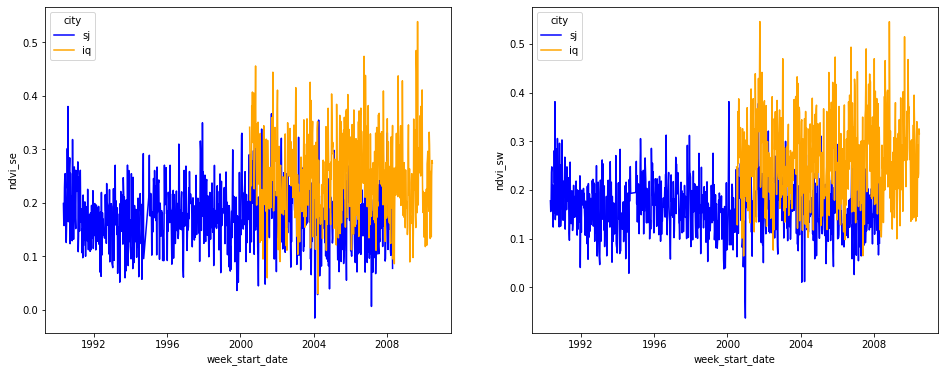

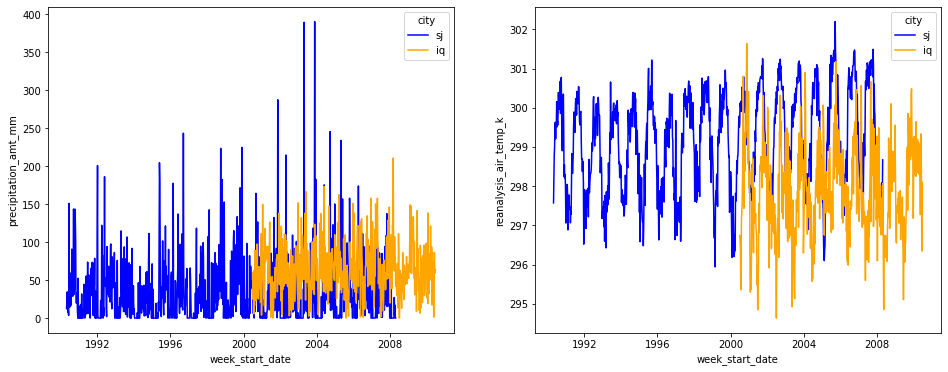

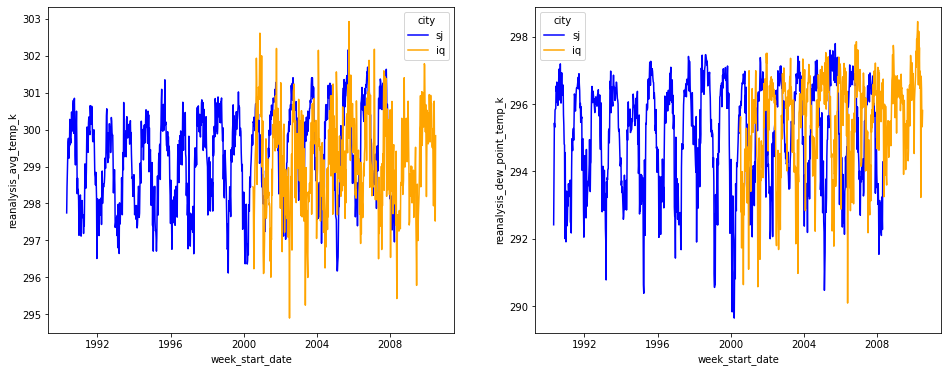

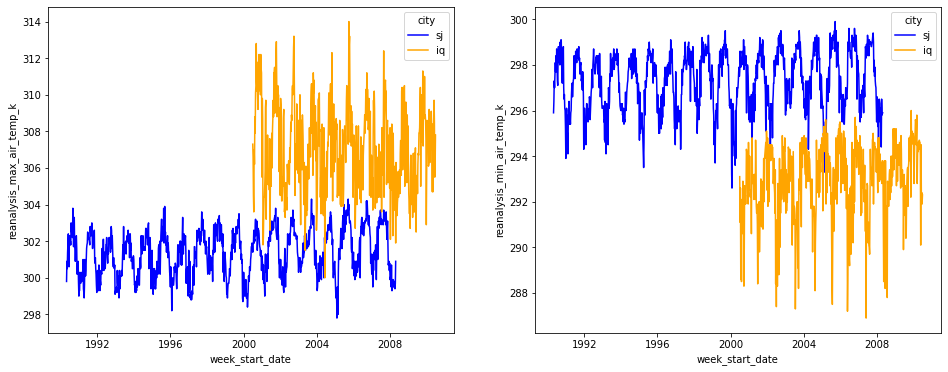

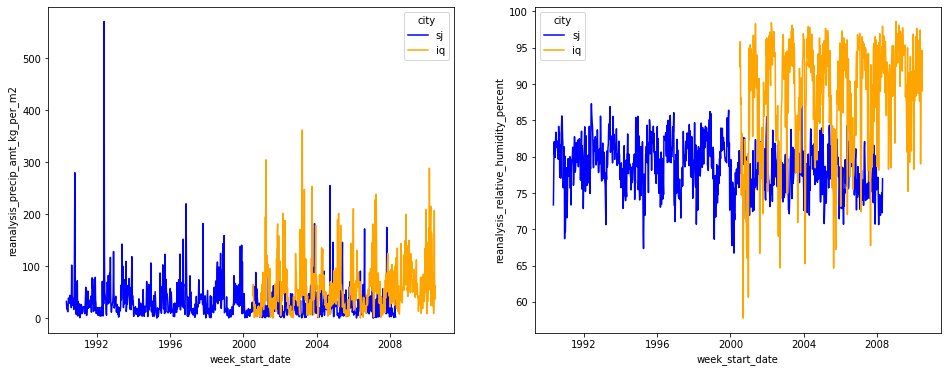

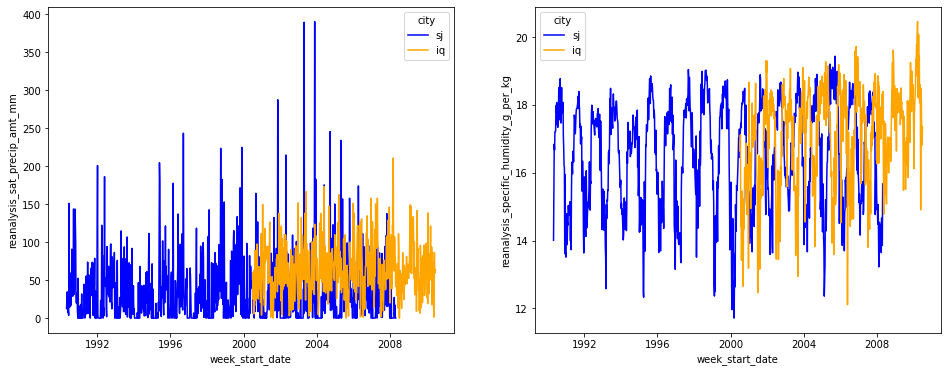

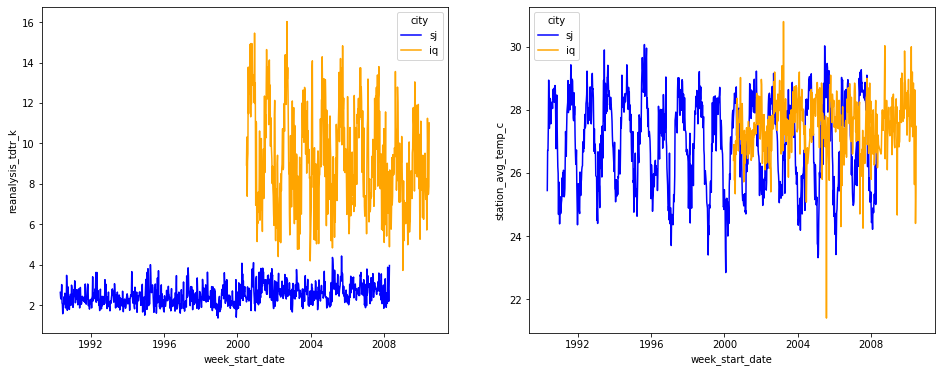

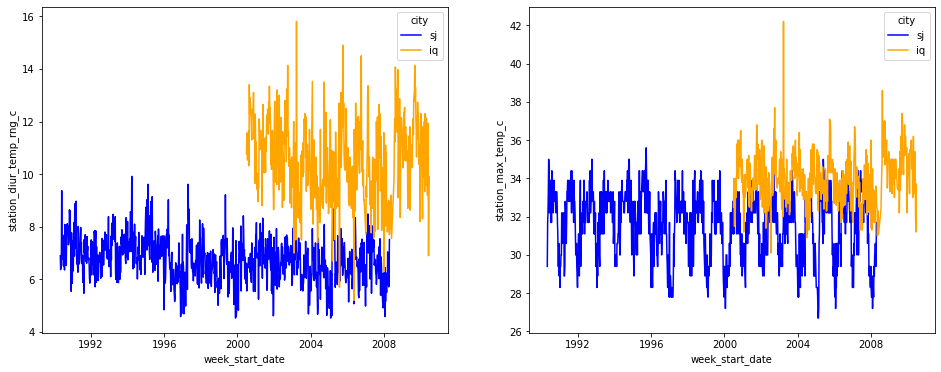

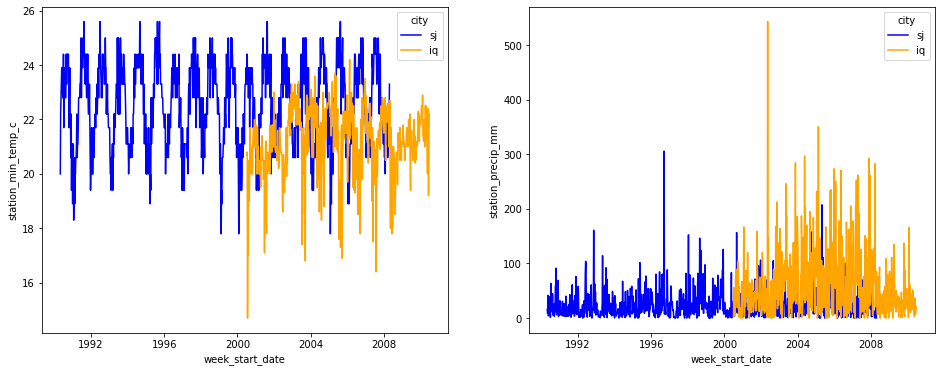

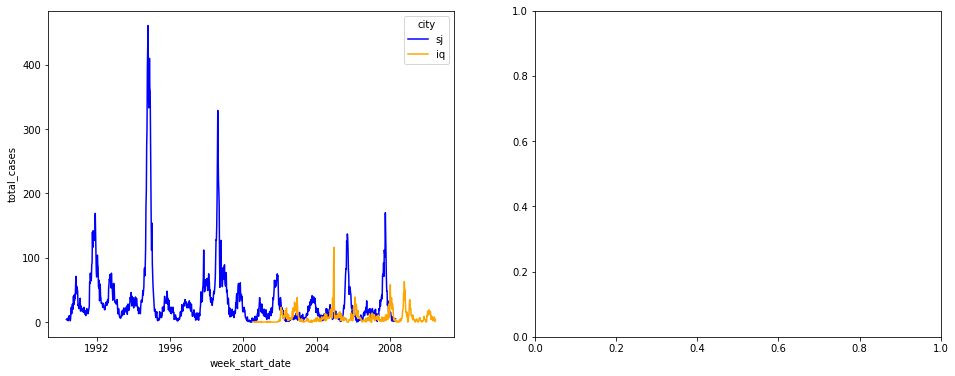

In [62]:
columns = [col for col in train_df.columns if col not in ['city', 'weekofyear', 'year', 'week_start_date']]
for i in range(0, len(columns), 2):
    fig, ax =plt.subplots(1,2, figsize=(16, 6))
    sns.lineplot(ax=ax[0], x='week_start_date', y=columns[i], hue='city', data = train_df, palette=['blue', 'orange'])
    if i+1 < len(columns):
        sns.lineplot(ax=ax[1], x='week_start_date', y=columns[i+1], hue='city', data = train_df, palette=['blue', 'orange'])
    plt.show()

### Relation between total cases and each feature
We plot this to see if there's some obvious relation between the features and the target.

There seems to be some relation with `reanalysis_min_air_temp_k` only

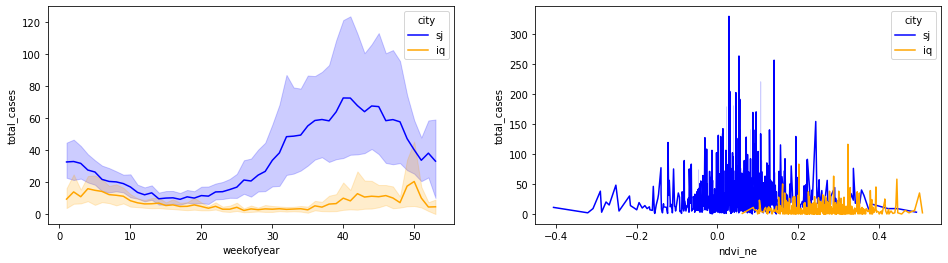

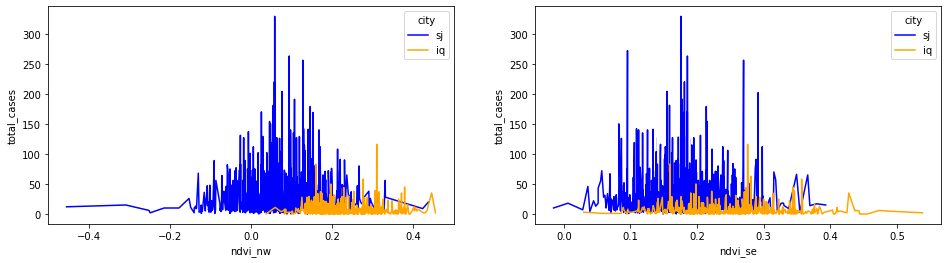

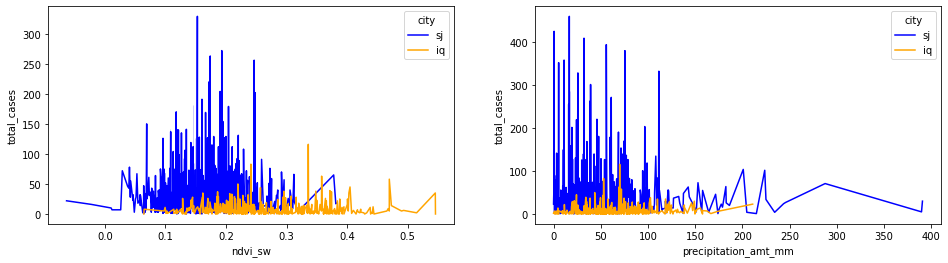

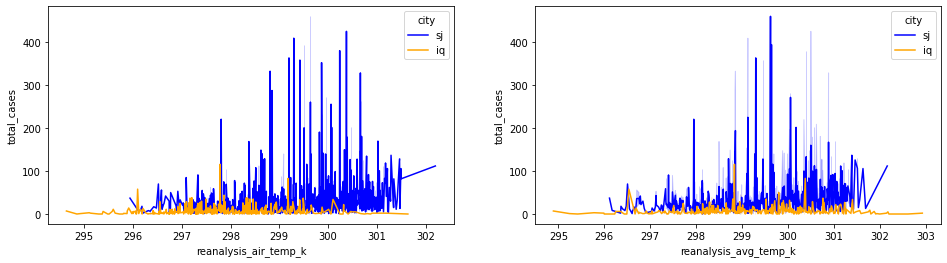

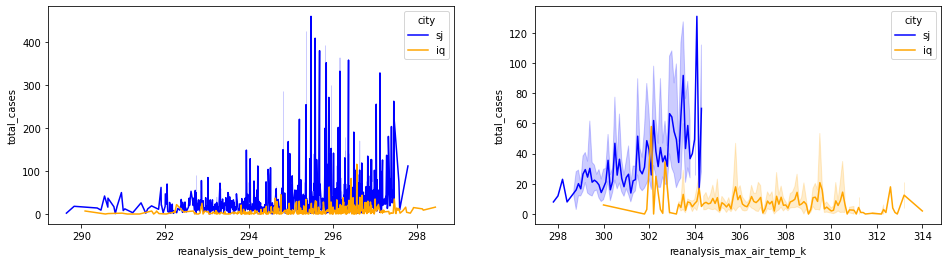

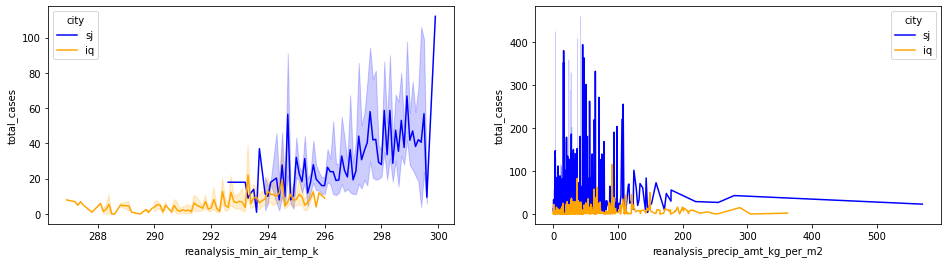

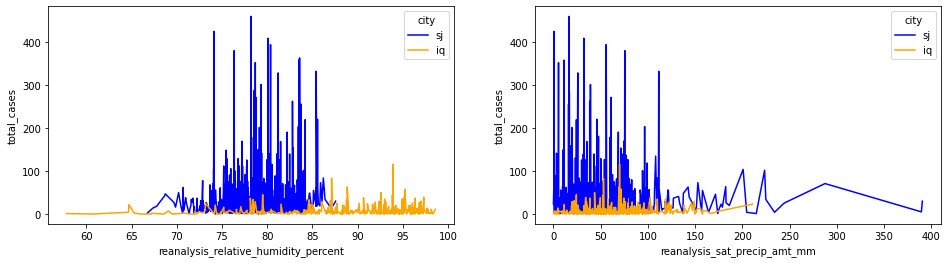

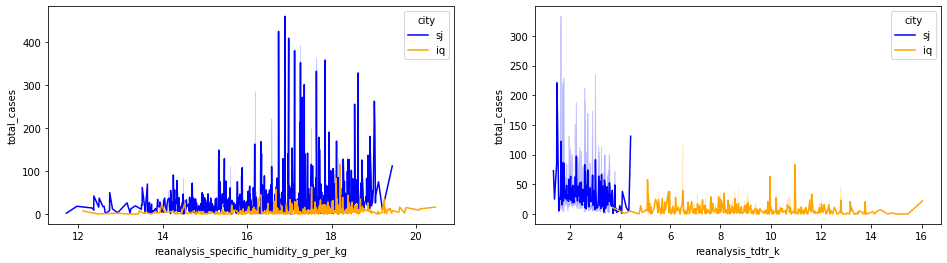

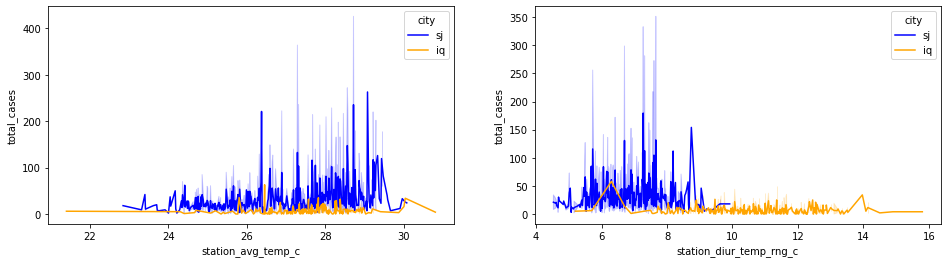

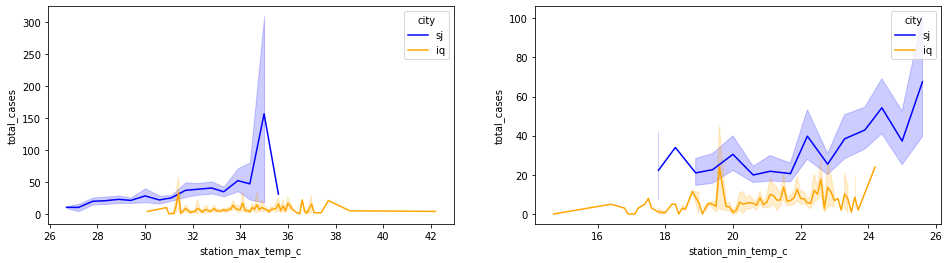

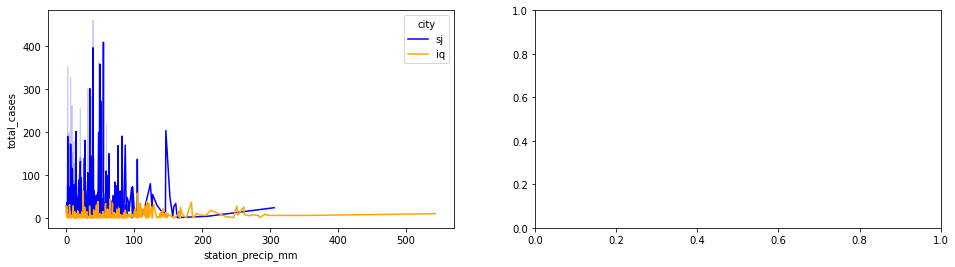

In [61]:
columns = [col for col in train_df.columns if col not in ['city','year', 'week_start_date', 'total_cases']]
for i in range(0, len(columns), 2):
    fig, ax =plt.subplots(1,2, figsize=(16, 4))
    sns.lineplot(ax=ax[0], x=columns[i], y='total_cases', hue='city', data = train_df, palette=['blue', 'orange'])
    if i+1 < len(columns):
        sns.lineplot(ax=ax[1], x=columns[i+1], y='total_cases', hue='city', data = train_df, palette=['blue', 'orange'])
    plt.show()

## Plot distribution
Each feature seems to have a different distribution for each city, which might indicate that having separate models to handle different behaviors might be a good solution.

We can also observe a Negative Binomial Distribution for the target

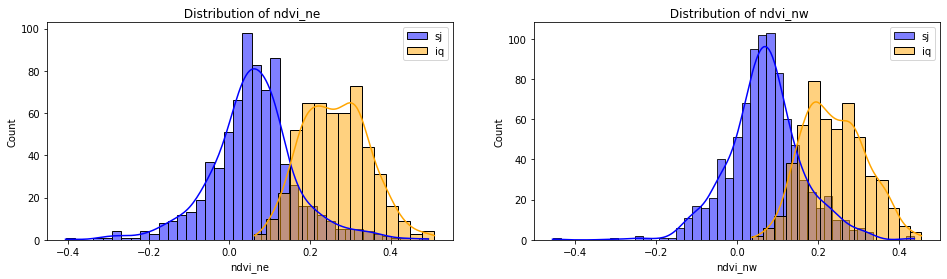

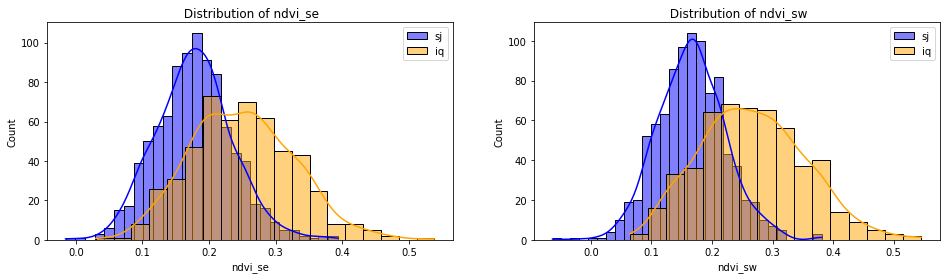

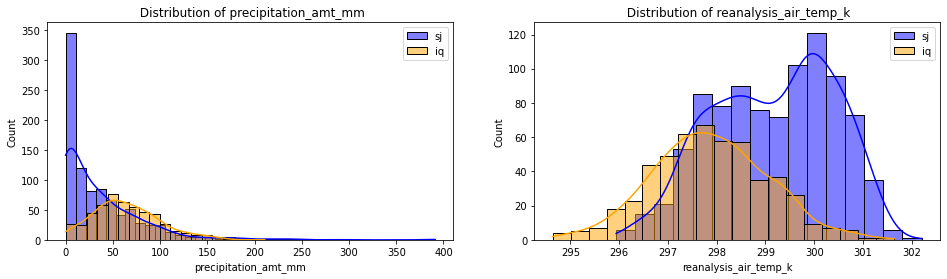

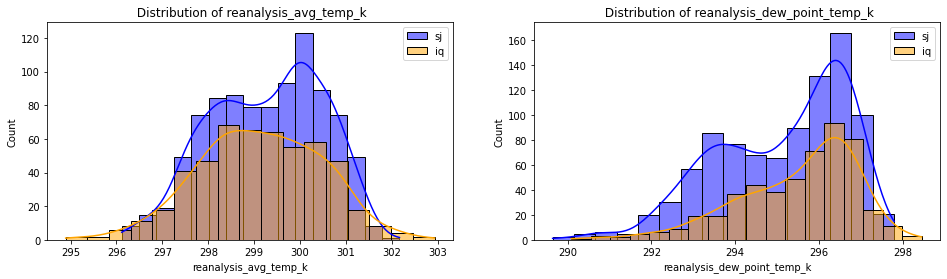

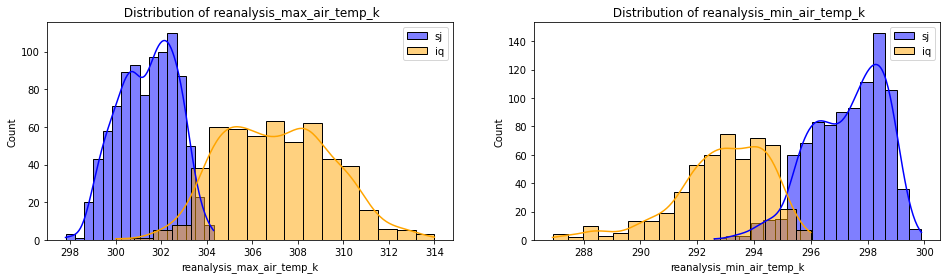

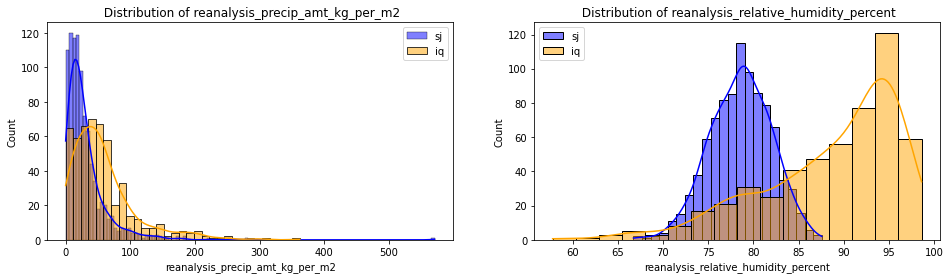

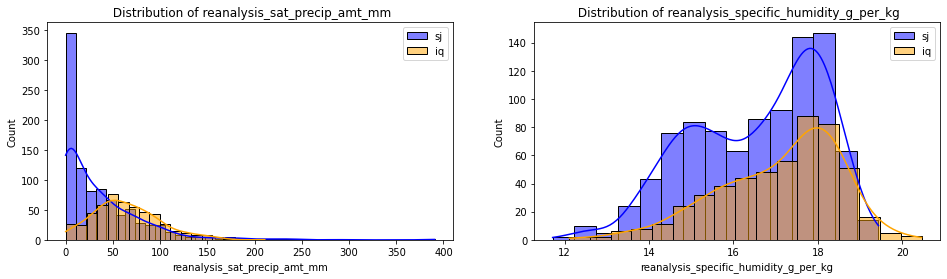

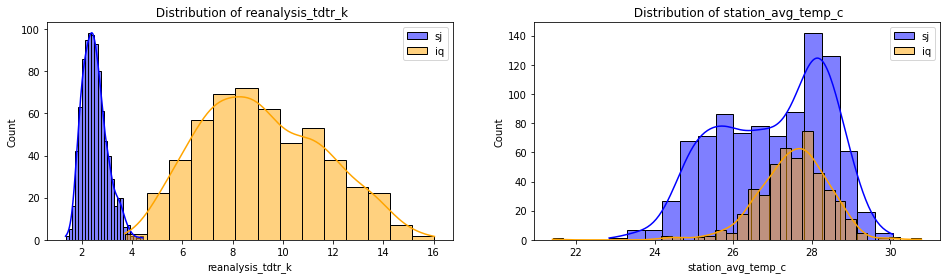

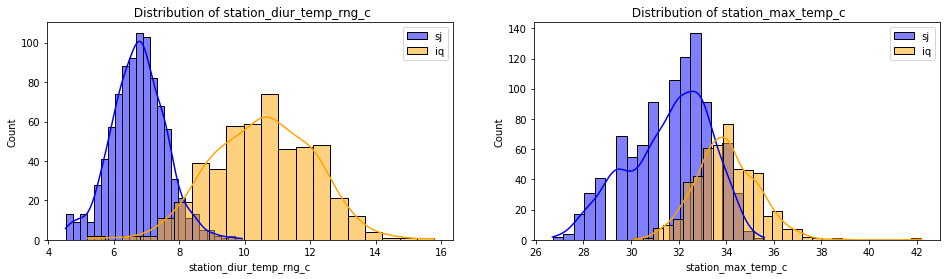

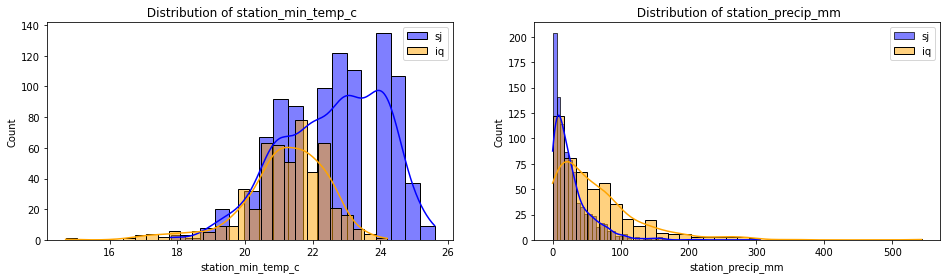

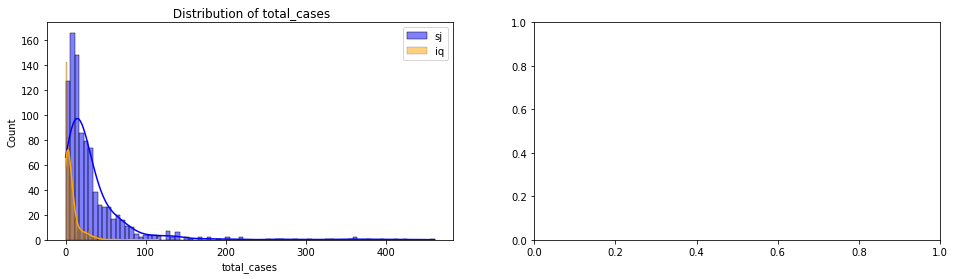

In [55]:
columns = [col for col in train_df.columns if col not in ['city', 'weekofyear', 'year', 'week_start_date']]
for i in range(0, len(columns), 2):
    fig, ax =plt.subplots(1,2, figsize=(16, 4))
    sns.histplot(train_df[train_df.city=='sj'][columns[i]], ax=ax[0], label='sj', kde=True, color='blue')
    sns.histplot(train_df[train_df.city=='iq'][columns[i]], ax=ax[0], label='iq', kde=True, color='orange')
    ax[0].set_title(f" Distribution of {columns[i]}")
    ax[0].legend()
    if i+1 < len(columns):
        sns.histplot(train_df[train_df.city=='sj'][columns[i+1]], ax=ax[1], label='sj', kde=True, color='blue')
        sns.histplot(train_df[train_df.city=='iq'][columns[i+1]], ax=ax[1], label='iq', kde=True, color='orange')
        ax[1].set_title(f" Distribution of {columns[i+1]}")
        ax[1].legend()
    plt.show()

In [65]:
train_df[train_df.city == 'sj'].describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,936.000000,936.000000,745.000000,887.000000,917.000000,917.000000,927.000000,930.000000,930.000000,930.000000,...,930.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,936.000000
mean,1998.826923,26.503205,0.057925,0.067469,0.177655,0.165956,35.470809,299.163653,299.276920,295.109519,...,78.568181,35.470809,16.552409,2.516267,27.006528,6.757373,31.607957,22.600645,26.785484,34.180556
std,5.212076,15.021909,0.107153,0.092479,0.057166,0.056073,44.606137,1.236429,1.218637,1.569943,...,3.389488,44.606137,1.560923,0.498892,1.415473,0.835993,1.717297,1.506277,29.325811,51.381372
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,...,66.735714,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000,0.000000
25%,1994.000000,13.750000,0.004500,0.016425,0.139283,0.129157,0.000000,298.195000,298.300000,293.847857,...,76.246071,0.000000,15.236429,2.157143,25.842857,6.200000,30.600000,21.700000,6.825000,9.000000
50%,1999.000000,26.500000,0.057700,0.068075,0.177186,0.165971,20.800000,299.254286,299.378571,295.464286,...,78.667857,20.800000,16.845714,2.457143,27.228571,6.757143,31.700000,22.800000,17.750000,19.000000
75%,2003.000000,39.250000,0.111100,0.115200,0.212557,0.202771,52.180000,300.132857,300.228571,296.418929,...,80.963214,52.180000,17.858571,2.800000,28.185714,7.285714,32.800000,23.900000,35.450000,37.000000
max,2008.000000,53.000000,0.493400,0.437100,0.393129,0.381420,390.600000,302.200000,302.164286,297.795714,...,87.575714,390.600000,19.440000,4.428571,30.071429,9.914286,35.600000,25.600000,305.900000,461.000000


In [66]:
train_df[train_df.city == 'iq'].describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,520.000000,520.000000,517.000000,517.000000,517.000000,517.000000,516.000000,516.000000,516.000000,516.000000,...,516.000000,516.000000,516.000000,516.000000,483.000000,483.000000,506.000000,512.000000,504.000000,520.000000
mean,2005.000000,26.503846,0.263869,0.238783,0.250126,0.266779,64.245736,297.869538,299.133043,295.492982,...,88.639117,64.245736,17.096110,9.206783,27.530933,10.566197,34.004545,21.196680,62.467262,7.565385
std,2.918283,15.029450,0.081370,0.076751,0.077354,0.086345,35.218995,1.170997,1.332073,1.417229,...,7.583889,35.218995,1.445769,2.448525,0.921769,1.535496,1.325261,1.260327,63.245958,10.765478
min,2000.000000,1.000000,0.061729,0.035860,0.029880,0.064183,0.000000,294.635714,294.892857,290.088571,...,57.787143,0.000000,12.111429,3.714286,21.400000,5.200000,30.100000,14.700000,0.000000,0.000000
25%,2002.750000,13.750000,0.200000,0.179540,0.194743,0.204129,39.105000,297.092500,298.221429,294.593929,...,84.295000,39.105000,16.102857,7.371429,27.000000,9.500000,33.200000,20.600000,17.200000,1.000000
50%,2005.000000,26.500000,0.263643,0.232971,0.249800,0.262143,60.470000,297.822857,299.121429,295.852143,...,90.917143,60.470000,17.428571,8.964286,27.600000,10.625000,34.000000,21.300000,45.300000,5.000000
75%,2007.250000,39.250000,0.319971,0.293929,0.302300,0.325150,85.757500,298.649286,300.123214,296.548571,...,94.563929,85.757500,18.180357,11.014286,28.100000,11.655000,34.900000,22.000000,85.950000,9.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,210.830000,301.637143,302.928571,298.450000,...,98.610000,210.830000,20.461429,16.028571,30.800000,15.800000,42.200000,24.200000,543.300000,116.000000


### Plot cross-correlation

<AxesSubplot:>

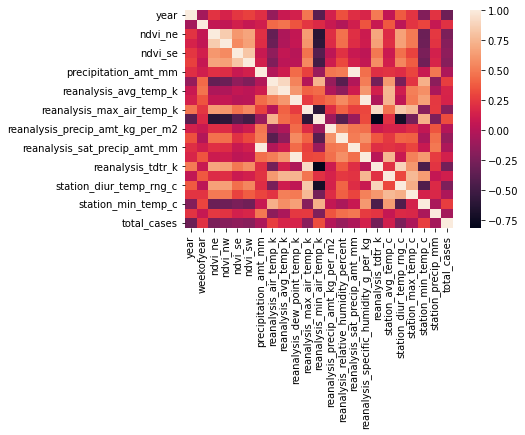

In [67]:
sns.heatmap(train_df.corr())

<AxesSubplot:>

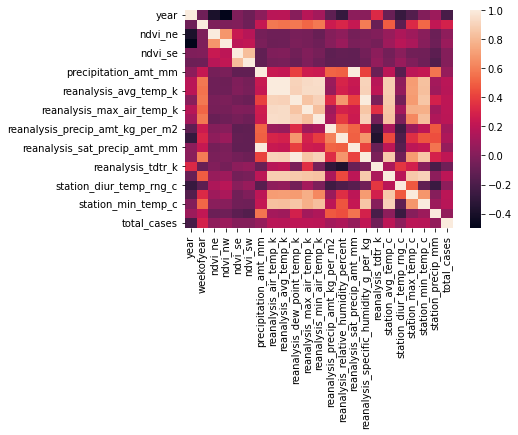

In [68]:
sns.heatmap(train_df[train_df.city=='sj'].corr())

<AxesSubplot:>

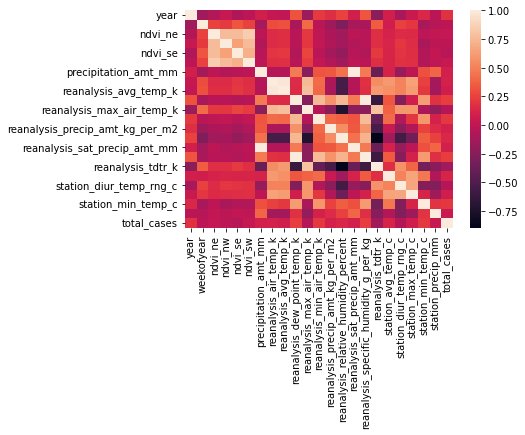

In [69]:
sns.heatmap(train_df[train_df.city=='iq'].corr())

### Initial exploration conclusions
* There is missing data that needs to be fixed
* There are outliers that need to be removed / fixed
* There seem to be a delayed relationship between temperature and total_cases
* Variables of similar kind look highly correlated

### Other explorations
- [ ] Check week of year

In [70]:
train_df['weekofyear_calc'] = train_df.progress_apply(lambda x: x.week_start_date.weekofyear, axis=1)

  0%|          | 0/1456 [00:00<?, ?it/s]

In [71]:
train_df[train_df.weekofyear != train_df.weekofyear_calc]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,weekofyear_calc
